# 0. Dependencies
This notebook requires three dependencies to work properly, all three which are publicly available:
1. Jupyter kernel containing the python package dependencies below. The easiest way to install a functioning kernel is to follow the step-by-step explanation in notebook `0_resources.ipynb`.
2. Region sets which can be used to calculate FRIP. You can either supply your own (e.g. generate from peak calling on aggregate data from your samples, or previous experiments), or use the ENCODE SCREEN regions, which can be downloaded from `PUMATAC_dependencies` (see notebook `0_resources.ipynb`)
3. Aligned fragments files generated using either `PUMATAC` or `cellranger`.


If you want to skip running either PUMATAC or cellranger, you can download a cellranger run output from the 10x website as follows:

In [1]:
import os
import subprocess
import shutil

output_dir = "output_dir"
sample_name = "8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller"
base_url = f"https://cf.10xgenomics.com/samples/cell-atac/2.1.0/{sample_name}/"

file_structure = {
    f"{output_dir}/{sample_name}/outs/analysis": [],
    f"{output_dir}/{sample_name}/outs/filtered_peak_bc_matrix": [],
    f"{output_dir}/{sample_name}/outs/filtered_tf_bc_matrix": [],
    f"{output_dir}/{sample_name}/outs/raw_peak_bc_matrix": [],
    f"{output_dir}/{sample_name}/outs": [
        "cloupe.cloupe",
        "filtered_peak_bc_matrix.h5",
        "filtered_tf_bc_matrix.h5",
        "fragments.tsv.gz",
        "fragments.tsv.gz.tbi",
        "peak_annotation.tsv",
        "peak_motif_mapping.bed",
        "peaks.bed",
        "raw_peak_bc_matrix.h5",
        "singlecell.csv",
        "summary.csv",
        "summary.json",
        "web_summary.html"
    ]
}

files = [
    f"{sample_name}_analysis.tar.gz",
    f"{sample_name}_filtered_peak_bc_matrix.tar.gz",
    f"{sample_name}_filtered_peak_bc_matrix.h5",
    f"{sample_name}_filtered_tf_bc_matrix.tar.gz",
    f"{sample_name}_filtered_tf_bc_matrix.h5",
    f"{sample_name}_fragments.tsv.gz",
    f"{sample_name}_fragments.tsv.gz.tbi",
    f"{sample_name}_peak_annotation.tsv",
    f"{sample_name}_peak_motif_mapping.bed",
    f"{sample_name}_peaks.bed",
    f"{sample_name}_raw_peak_bc_matrix.tar.gz",
    f"{sample_name}_raw_peak_bc_matrix.h5",
    f"{sample_name}_singlecell.csv",
    f"{sample_name}_summary.csv",
    f"{sample_name}_summary.json",
    f"{sample_name}_web_summary.html",
    f"{sample_name}_cloupe.cloupe"
]

for directory in file_structure.keys():
    os.makedirs(directory, exist_ok=True)

all_files_present = True
for dir_path, expected_files in file_structure.items():
    for file in expected_files:
        if not os.path.exists(os.path.join(dir_path, file)):
            all_files_present = False
            break
    if not all_files_present:
        break

if all_files_present:
    print(f"all expected files already exist in {output_dir}/{sample_name}, skipping download and organization...")
else:
    for file in files:
        if not os.path.exists(file):
            url = base_url + file
            print(f"downloading {file}...")
            subprocess.run(["curl", "-O", url], check=True)
        else:
            print(f"{file} already exists, skipping download...")
        
        new_filename = file.replace(f"{sample_name}_", "")
        if new_filename.endswith('.tar.gz'):
            subfolder = new_filename.replace('.tar.gz', '')
            extract_path = f"{output_dir}/{sample_name}/outs/{subfolder}"
            shutil.unpack_archive(file, extract_path)
            os.remove(file)
        else:
            destination = f"{output_dir}/{sample_name}/outs/{new_filename}"
            shutil.move(file, destination)

    print("file organization complete!")

downloading 8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller_analysis.tar.gz...


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  184M  100  184M    0     0   104M      0  0:00:01  0:00:01 --:--:--  104M


downloading 8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller_filtered_peak_bc_matrix.tar.gz...


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  207M  100  207M    0     0   147M      0  0:00:01  0:00:01 --:--:--  147M


downloading 8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller_filtered_peak_bc_matrix.h5...


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  101M  100  101M    0     0  13.8M      0  0:00:07  0:00:07 --:--:-- 17.1M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

downloading 8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller_filtered_tf_bc_matrix.tar.gz...


100 19.8M  100 19.8M    0     0  87.5M      0 --:--:-- --:--:-- --:--:-- 87.5M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

downloading 8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller_filtered_tf_bc_matrix.h5...


100 5983k  100 5983k    0     0  3389k      0  0:00:01  0:00:01 --:--:-- 3388k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

downloading 8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller_fragments.tsv.gz...


100 2187M  100 2187M    0     0   130M      0  0:00:16  0:00:16 --:--:--  117M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

downloading 8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller_fragments.tsv.gz.tbi...


100 1009k  100 1009k    0     0   735k      0  0:00:01  0:00:01 --:--:--  735k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

downloading 8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller_peak_annotation.tsv...


100 9164k  100 9164k    0     0  4215k      0  0:00:02  0:00:02 --:--:-- 4215k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

downloading 8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller_peak_motif_mapping.bed...


100 32.5M  100 32.5M    0     0  12.1M      0  0:00:02  0:00:02 --:--:-- 12.1M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

downloading 8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller_peaks.bed...


100 4131k  100 4131k    0     0  2381k      0  0:00:01  0:00:01 --:--:-- 2379k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

downloading 8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller_raw_peak_bc_matrix.tar.gz...


100  225M  100  225M    0     0   143M      0  0:00:01  0:00:01 --:--:--  143M


downloading 8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller_raw_peak_bc_matrix.h5...


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  111M  100  111M    0     0  12.9M      0  0:00:08  0:00:08 --:--:-- 16.2M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

downloading 8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller_singlecell.csv...


100 32.8M  100 32.8M    0     0   137M      0 --:--:-- --:--:-- --:--:--  137M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1128  100  1128    0     0  22560      0 --:--:-- --:--:-- --:--:-- 22560
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

downloading 8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller_summary.csv...
downloading 8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller_summary.json...


100 26354  100 26354    0     0  33874      0 --:--:-- --:--:-- --:--:-- 33874
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

downloading 8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller_web_summary.html...


100 2821k    0 2821k    0     0  1781k      0 --:--:--  0:00:01 --:--:-- 1780k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

downloading 8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller_cloupe.cloupe...


 99  832M   99  827M    0     0  9914k      0  0:01:26  0:01:25  0:00:01 9680k

file organization complete!


100  832M  100  832M    0     0  9915k      0  0:01:26  0:01:26 --:--:-- 9704k


In [2]:
%load_ext autoreload
%autoreload 2

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

import pycisTopic
import glob
import os
import pybiomart as pbm
import pandas as pd
import pickle
from pycisTopic.qc import *
from IPython.display import Image, display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import palettable
import pypumatac as pum  # this loads the main functions needed in this notebook.
import pprint as pp
import polars as pl


%matplotlib inline
%load_ext jupyter_black

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Run basic cisTopic analysis

Define which pipeline was used to generate your output using the variable `pipeline`. This can be either `PUMATAC`, `cellranger-atac` or `cellranger-arc`. For `cellranger-atac` and `cellranger-arc`, list a master directory which contains the cellranger output directories. i.e. if you have 5 cellranger runs, put the output directories in one master directory, and redirect `output_dir` there. In this example, I use the classic 10x cellranger `8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller` dataset downloaded above. You can see that within `output_dir`, there is one subdir for that particular cellranger run.



In [3]:
output_dir = "output_dir"
pum.list_files(output_dir, maxlevel=5)

output_dir/
    8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller/
        outs/
            filtered_tf_bc_matrix/
                filtered_tf_bc_matrix/
            filtered_peak_bc_matrix/
                filtered_peak_bc_matrix/
            raw_peak_bc_matrix/
                raw_peak_bc_matrix/
            analysis/
                analysis/
                    clustering/
                    tsne/
                    enrichment/
                    umap/
                    lsa/


### Find paths to fragments
The following list comprehension should find fragments files in your `output_dir`.

In [4]:
import os
import glob

pipeline_dict = {}
fragments_paths_dict = {}
optional_filter = ""

# PUMATAC pipeline
pumatac_fragments_dict = {
    os.path.basename(x).split(".fragments.tsv.gz")[0]: x
    for x in sorted(
        glob.glob(f"{output_dir}/data/fragments/*{optional_filter}*fragments.tsv.gz")
    )
}
for sample in pumatac_fragments_dict:
    pipeline_dict[sample] = "PUMATAC"
fragments_paths_dict.update(pumatac_fragments_dict)

cr_atac_fragments_dict = {
    x.split("/")[-3]: x
    for x in sorted(
        glob.glob(f"{output_dir}/*{optional_filter}*/outs/fragments.tsv.gz")
    )
}
for sample in cr_atac_fragments_dict:
    pipeline_dict[sample] = "cellranger-atac"
fragments_paths_dict.update(cr_atac_fragments_dict)

cr_arc_fragments_dict = {
    x.split("/")[-3]: x
    for x in sorted(
        glob.glob(f"{output_dir}/*{optional_filter}*/outs/atac_fragments.tsv.gz")
    )
}
for sample in cr_arc_fragments_dict:
    pipeline_dict[sample] = "cellranger-arc"
fragments_paths_dict.update(cr_arc_fragments_dict)

print("fragments_paths_dict:")
pp.pprint(fragments_paths_dict)
print("\npipeline_dict:")
pp.pprint(pipeline_dict)

fragments_paths_dict:
{'8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller': 'output_dir/8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller/outs/fragments.tsv.gz'}

pipeline_dict:
{'8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller': 'cellranger-atac'}


### Define which genome should be used for each sample
Create a dummy `genome_dict` first. The dummy genome assigns `standard_genome` (e.g. dm6) to all samples by default. If some samples deviate, you can adjust where necessary (valid values for this notebook are `hg38`, `mm10` and `dm6`, if you work with other genomes, you can manually add gene annotation and regions as you please).

In [5]:
standard_genome = "mm10"
genome_dict = {sample: standard_genome for sample in fragments_paths_dict.keys()}
genome_dict

{'8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller': 'mm10'}

You can then copy the `dumy_genome_dict` and manually set the real `genome_dict` here (replace `mm10` by `hg38` or `dm6` where necessary, or a custom genome if another species (see furhter):

In [6]:
genome_dict = {"8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller": "mm10"}

Check if all samples are included:

In [7]:
if not set(genome_dict.keys()) == set(fragments_paths_dict.keys()):
    print("Warning, not all fragments files have genomes defined.")
else:
    print("Genomes defined for all fragments files!")

Genomes defined for all fragments files!


Create an inverse dictionary, listing the samples per genome.

In [8]:
inverse_genome_dict = {}
for sample, genome in genome_dict.items():
    if genome not in inverse_genome_dict:
        inverse_genome_dict[genome] = []
    inverse_genome_dict[genome].append(sample)

inverse_genome_dict

{'mm10': ['8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller']}

### Define sample aliases
We can also define a `sample_alias_dict` which defines short hand names for each sample which will be used in the titles of plots.

In [9]:
sample_alias_dict = {x: x for x in fragments_paths_dict.keys()}
sample_alias_dict

{'8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller': '8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller'}

Then, manually adjust to your liking

In [10]:
sample_alias_dict = {
    "8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller": "8k Mouse Cortex 10x v2"
}

### Download a gene annotation from biomart
We need gene annotations to calculate TSS enrichment of fragments later. The following code will work for `hg38`, `hg37`, `mm10` and `dm6`.

In [11]:
annotation_dict = pum.download_genome_annotation(inverse_genome_dict)

Loading cached genome annotation mm10_annotation.tsv


A genome annotation for `standard_genome` looks like so:

In [12]:
annotation_dict[standard_genome]

,Chromosome,Start,Strand,Gene,Transcript_type
58,chr2,154551776,1,Actl10,protein_coding
624,chrX,31117674,1,Btbd35f29,protein_coding
946,chr7,84915781,1,Olfr290,protein_coding
977,chrY,90839177,-1,Gm21748,protein_coding
1000,chr4,108719649,1,3110021N24Rik,protein_coding
...,...,...,...,...,...
136372,chr6,134791334,-1,Dusp16,protein_coding
136373,chr14,51203391,1,Ear14,protein_coding
136374,chr14,51203689,1,Ear14,protein_coding
136378,chr12,85274286,1,Zc2hc1c,protein_coding


### Make sure that the chromosome names in your annotation match the chromosome names in your fragments files.
Depending on the genome index you use, the prefix `chr` may be omitted in your fragments files. You can check this via the following cell, which checks which chromosomes are present here. Note that this code can take a few minutes per fragments file. It is assumed that your fragments files are homogenous in this regard: they either all have the chr prefix or not.

In [13]:
check_fragments = True
fragments_contain_chr = {}

if check_fragments:
    for sample, file in fragments_paths_dict.items():
        fragments_df = pum.read_bc_and_counts_from_fragments_file(file)
        chromosome_names = sorted(
            fragments_df.select(pl.col("Chromosome").unique()).to_series().to_list()
        )
        print(f"Chromosome names for {sample}:")
        print(chromosome_names)

        contains_chr = any("chr" in chrom for chrom in chromosome_names)
        fragments_contain_chr[sample] = contains_chr
        print(f"Chromosome names contain 'chr': {contains_chr}")

for genome in annotation_dict.keys():
    for sample in fragments_contain_chr:
        if fragments_contain_chr[sample]:
            annotation_dict[genome]["Chromosome"] = [
                f"chr{x}" if not x.startswith("chr") else x
                for x in annotation_dict[genome]["Chromosome"]
            ]
        else:
            annotation_dict[genome]["Chromosome"] = [
                x.replace("chr", "") for x in annotation_dict[genome]["Chromosome"]
            ]

Chromosome names for 8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller:
['GL456210.1', 'GL456211.1', 'GL456212.1', 'GL456216.1', 'GL456221.1', 'GL456233.1', 'GL456354.1', 'JH584292.1', 'JH584295.1', 'JH584296.1', 'JH584297.1', 'JH584299.1', 'JH584304.1', 'chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chrX', 'chrY']
Chromosome names contain 'chr': True


In [14]:
annotation_dict[standard_genome]

,Chromosome,Start,Strand,Gene,Transcript_type
58,chr2,154551776,1,Actl10,protein_coding
624,chrX,31117674,1,Btbd35f29,protein_coding
946,chr7,84915781,1,Olfr290,protein_coding
977,chrY,90839177,-1,Gm21748,protein_coding
1000,chr4,108719649,1,3110021N24Rik,protein_coding
...,...,...,...,...,...
136372,chr6,134791334,-1,Dusp16,protein_coding
136373,chr14,51203391,1,Ear14,protein_coding
136374,chr14,51203689,1,Ear14,protein_coding
136378,chr12,85274286,1,Zc2hc1c,protein_coding


If you want to use your own custom genome annotation, you can write an annotation in this format in a file named  `{genome}_annotation.tsv` in the current working directory.

### Define which regions to use to calculate fraction of reads in peaks
Ideally this should be cluster consensus peaks called on each sample individually, but for rough QC purposes, the ENCODE SCREEN regions suffice.  
We host a copy of these regions for mm10 and hg38 here https://resources.aertslab.org/papers/PUMATAC/PUMATAC_dependencies/regions/. For dm6, you can use the cisTarget regions: https://resources.aertslab.org/cistarget/regions/dm6__regulatory_regions.regionid-location.bed. If you want to use other regions, please add the path and the corresponding genome name as a value-key pair in `screen_path_dict` below.

In [15]:
screen_path_dict = {
    "hg38": "PUMATAC_dependencies/regions/V2.hg38-rDHS-Unfiltered.blacklisted.bed",
    "hg38_nochr": "PUMATAC_dependencies/regions/V2.hg38-rDHS-Unfiltered.blacklisted.NOCHR.bed",
    "mm10": "PUMATAC_dependencies/regions/V2.mm10-rDHS-Unfiltered.blacklisted.bed",
    "mm10_nochr": "PUMATAC_dependencies/regions/V2.mm10-rDHS-Unfiltered.blacklisted.NOCHR.bed",
    "dm6": "PUMATAC_dependencies/regions/dm6__regulatory_regions.regionid-location.bed",
    "dm6_nochr": "PUMATAC_dependencies/regions/dm6__regulatory_regions.regionid-location.NOCHR.bed",
}
screen_path_dict

{'hg38': 'PUMATAC_dependencies/regions/V2.hg38-rDHS-Unfiltered.blacklisted.bed',
 'hg38_nochr': 'PUMATAC_dependencies/regions/V2.hg38-rDHS-Unfiltered.blacklisted.NOCHR.bed',
 'mm10': 'PUMATAC_dependencies/regions/V2.mm10-rDHS-Unfiltered.blacklisted.bed',
 'mm10_nochr': 'PUMATAC_dependencies/regions/V2.mm10-rDHS-Unfiltered.blacklisted.NOCHR.bed',
 'dm6': 'PUMATAC_dependencies/regions/dm6__regulatory_regions.regionid-location.bed',
 'dm6_nochr': 'PUMATAC_dependencies/regions/dm6__regulatory_regions.regionid-location.NOCHR.bed'}

In [16]:
# generate regions_paths_dict
regions_paths_dict = {}
for sample, fragments_path in fragments_paths_dict.items():
    for genome in annotation_dict.keys():
        genome_key = genome

        if genome_key in screen_path_dict:
            regions_paths_dict[sample] = screen_path_dict[genome_key]
            break  # use the first matching genome
    else:
        print(f"warning: no matching genome found for sample {sample}")

print(regions_paths_dict)

{'8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller': 'PUMATAC_dependencies/regions/V2.mm10-rDHS-Unfiltered.blacklisted.bed'}


You can manually edit this dictionary and substitute your own regions.

### Run cisTopic quality control tools
cisTopic has a suite of functions which calculate per-barcode quality metrics such as number of (unique) fragments, TSS enrichment, fraction of fragments in peaks and so on. Make a directory for cisTopic output:

In [17]:
cistopic_qc_out = "cistopic_qc_out"
if not os.path.exists(cistopic_qc_out):
    os.makedirs(cistopic_qc_out)

Determine which fragments files have already gone through cisTopic QC (in case you ran this notebook before)

In [18]:
fragments_sub_dict = {}
regions_sub_dict = {}
for sample in fragments_paths_dict.keys():
    metadata_file = os.path.join(cistopic_qc_out, sample + "__metadata_bc.pkl")
    print(f"Checking if {metadata_file} exist...")
    if os.path.exists(metadata_file):
        print("\tMetadata exists! Skipping...")
    else:
        fragments_sub_dict[sample] = fragments_paths_dict[sample]
        print("\tMetadata does not exist, adding to subdict to generate")

regions_sub_dict = {x: regions_paths_dict[x] for x in sorted(fragments_sub_dict.keys())}
regions_sub_dict

Checking if cistopic_qc_out/8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller__metadata_bc.pkl exist...
	Metadata does not exist, adding to subdict to generate


{'8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller': 'PUMATAC_dependencies/regions/V2.mm10-rDHS-Unfiltered.blacklisted.bed'}

Then execute cisTopic. The following code will run pycisTopic's QC toolbox on the fragments files provided above. It does so in blocks, where the number of samples per block is defined by `n_cores`. For example, if you have 64 samples, and you define `n_cores = 8`, the following loop will call ray 8 times and run 8 samples each time.

In [19]:
ray.shutdown()

In [20]:
n_cores = 8
for genome, samples in inverse_genome_dict.items():
    if regions_sub_dict != {}:
        samples_sub = list(set(regions_sub_dict.keys()).intersection(samples))
        blocks = [
            samples_sub[i : i + n_cores] for i in range(0, len(samples_sub), n_cores)
        ]
        pp.pprint(blocks)
        for samples_torun_in_block in blocks:
            fragments_sub_dict_block = {
                key: fragments_sub_dict[key] for key in samples_torun_in_block
            }
            regions_sub_dict_block = {
                key: regions_sub_dict[key] for key in samples_torun_in_block
            }
            print(f"Running samples {samples_torun_in_block} for genome {genome}")

            metadata_bc_dict, profile_data_dict = compute_qc_stats(
                fragments_dict=fragments_sub_dict_block,
                tss_annotation=annotation_dict[genome],
                stats=[
                    "barcode_rank_plot",
                    "duplicate_rate",
                    "insert_size_distribution",
                    "profile_tss",
                    "frip",
                ],
                label_list=None,
                path_to_regions=regions_sub_dict_block,
                n_cpu=n_cores,
                valid_bc=None,
                n_frag=10,
                n_bc=None,
                tss_flank_window=2000,
                tss_window=50,
                tss_minimum_signal_window=100,
                tss_rolling_window=10,
                # min_norm=0.2,
                remove_duplicates=True,
            )

            ray.shutdown()
            print(f"Done, writing files to {cistopic_qc_out}...")
            for sample in sorted(metadata_bc_dict.keys()):
                metadata_bc_dict[sample]["sample_id"] = sample
                metadata_bc_dict[sample].index = [
                    x + "___" + sample for x in list(metadata_bc_dict[sample].index)
                ]
                with open(
                    os.path.join(cistopic_qc_out, f"{sample}__metadata_bc.pkl"), "wb"
                ) as f:
                    pickle.dump(metadata_bc_dict[sample], f, protocol=4)

                with open(
                    os.path.join(cistopic_qc_out, f"{sample}__profile_data.pkl"), "wb"
                ) as f:
                    pickle.dump(profile_data_dict[sample], f, protocol=4)
    else:
        print("All samples already processed.")

[['8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller']]
Running samples ['8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller'] for genome mm10


2024-10-07 01:15:54,920	INFO worker.py:1616 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


(compute_qc_stats_ray pid=2589429) 2024-10-07 01:15:57,258 cisTopic     INFO     Reading 8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller
(compute_qc_stats_ray pid=2589429) 2024-10-07 01:19:39,455 cisTopic     INFO     Computing barcode rank plot for 8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller
(compute_qc_stats_ray pid=2589429) 2024-10-07 01:19:39,455 cisTopic     INFO     Counting fragments
(compute_qc_stats_ray pid=2589429) 2024-10-07 01:19:45,969 cisTopic     INFO     Marking barcodes with more than 10
(compute_qc_stats_ray pid=2589429) 2024-10-07 01:19:46,021 cisTopic     INFO     Returning plot data
(compute_qc_stats_ray pid=2589429) 2024-10-07 01:19:46,033 cisTopic     INFO     Returning valid barcodes
(compute_qc_stats_ray pid=2589429) 2024-10-07 01:19:52,870 cisTopic     INFO     Computing duplicate rate plot for 8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller
(compute_qc_stats_ray pid=2589429) 2024-10-07 01:20:02,263 cisTopic     INFO     Return plot data
(compute_

We have now calculated various QC metrics and can proceed. `{sample}__metadata_bc.pkl` contains barcode level quality metrics such as number of fragments, TSS enrichment, ... per barcode. `__profile_data.pkl` contains the aggregate accessibility profile around TSS for every barcode.

In [21]:
sorted(os.listdir(cistopic_qc_out))

['8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller__metadata_bc.pkl',
 '8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller__profile_data.pkl']

### Filter cells from background noise
We then filter true cells (high TSS enrichment, and high number of unique fragments \[in peaks\]).

In [22]:
import seaborn as sns
import pprint as pp

Then, find the `__metadata_bc.pkl` files we just generated using cisTopic:

In [23]:
metadata_bc_pkl_path_dict = {
    os.path.basename(x).split("__metadata_bc.pkl")[0]: x
    for x in sorted(glob.glob(f"{cistopic_qc_out}/*metadata_bc.pkl"))
}

metadata_bc_df_all = pd.DataFrame()
for sample in metadata_bc_pkl_path_dict.keys():
    with open(metadata_bc_pkl_path_dict[sample], "rb") as fh:
        metadata_bc_df = pickle.load(fh)
        metadata_bc_df_all = pd.concat([metadata_bc_df_all, metadata_bc_df])
        print(f"Added {sample} metadata_bc_df")

metadata_bc_pkl_path_dict

Added 8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller metadata_bc_df


{'8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller': 'cistopic_qc_out/8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller__metadata_bc.pkl'}

Calculate global maxima for variables, will be used to scale plots later so they can be compared directly visually.

In [24]:
max_dict = {}
min_dict = {}
for stat in metadata_bc_df_all.columns:
    max_dict[stat] = metadata_bc_df_all[stat].max()
    min_dict[stat] = metadata_bc_df_all[stat].min()

pp.pprint(min_dict)
pp.pprint(max_dict)

{'Dupl_nr_frag': 0,
 'Dupl_rate': 0.0,
 'FRIP': 0.0,
 'Log_total_nr_frag': 1.0413926851582251,
 'Log_unique_nr_frag': 1.0413926851582251,
 'TSS_enrichment': 0.0,
 'Total_nr_frag': 11,
 'Total_nr_frag_in_regions': 0,
 'Unique_nr_frag': 11,
 'Unique_nr_frag_in_regions': 0,
 'sample_id': '8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller'}
{'Dupl_nr_frag': 63588,
 'Dupl_rate': 0.8805443548387096,
 'FRIP': 1.0,
 'Log_total_nr_frag': 5.1734543406423485,
 'Log_unique_nr_frag': 5.04080006125653,
 'TSS_enrichment': 57.646691258516356,
 'Total_nr_frag': 149092,
 'Total_nr_frag_in_regions': 71953,
 'Unique_nr_frag': 109850,
 'Unique_nr_frag_in_regions': 48920,
 'sample_id': '8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller'}


Now, we will apply Otsu's algorithm on all cells with more than `standard_min_x_val` fragments and a higher than `standard_min_y_val` TSS enrichment. For some samples, the standard minimum values might not produce good results, so these can be edited here if you want. For high quality samples, the standard values should work nicely. By default, Otsu's algorithm is applied to all cell barcodes with more than 100 barcodes and a TSS enrichment of 1. For most (high quality) samples, this works well. However, for some samples, especially samples with a high amount of low-quality barcodes, a higher threshold may be necessary. This can be done using the following dictionary:

In [25]:
samples_tech_dict = {x: "10x_atac" for x in fragments_paths_dict.keys()}
samples_tech_dict

{'8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller': '10x_atac'}

In [26]:
standard_min_x_val = 100
standard_min_y_val = 1

min_otsu_frags_dict = {}
min_otsu_tss_dict = {}

for sample in samples:
    min_otsu_frags_dict[sample] = standard_min_x_val
    min_otsu_tss_dict[sample] = standard_min_y_val

In [27]:
kde = False

In [28]:
from IPython.display import Image, display

In [29]:
if not os.path.exists("plots_qc"):
    os.mkdir("plots_qc")
if not os.path.exists("selected_barcodes"):
    os.mkdir("selected_barcodes")

In [30]:
x_threshold_dict = {}
y_threshold_dict = {}
bc_dict = {}
n_bc_dict = {}

for sample in samples:
    with open(metadata_bc_pkl_path_dict[sample], "rb") as fh:
        metadata_bc_df = pickle.load(fh)

    x_arr = np.log10(metadata_bc_df["Unique_nr_frag_in_regions"])
    x_threshold_log = pum.threshold_otsu(
        x_arr, nbins=5000, min_value=np.log10(min_otsu_frags_dict[sample])
    )
    x_threshold = 10**x_threshold_log
    x_threshold_dict[sample] = x_threshold

    y_arr = metadata_bc_df["TSS_enrichment"]
    y_threshold = pum.threshold_otsu(
        y_arr, nbins=5000, min_value=min_otsu_tss_dict[sample]
    )
    y_threshold_dict[sample] = y_threshold

    # calculate cells passing filter
    metadata_bc_df_passing_filters = metadata_bc_df.loc[
        (metadata_bc_df.Unique_nr_frag_in_regions > x_threshold)
        & (metadata_bc_df.TSS_enrichment > y_threshold)
    ]
    bc_passing_filters = metadata_bc_df_passing_filters.index
    bc_dict[sample] = bc_passing_filters
    n_bc_dict[sample] = len(bc_passing_filters)

    print("\tSaving...")
    with open(f"selected_barcodes/{sample}_bc_passing_filters_otsu.pkl", "wb") as fh:
        pickle.dump(bc_passing_filters, fh)
    fh.close()

    fh = open(f"selected_barcodes/{sample}_bc_passing_filters_otsu.txt", "w")
    for bc in list(bc_passing_filters):
        fh.write(bc + "\n")
    fh.close()

    metadata_bc_df.loc[bc_passing_filters].to_csv(
        f"selected_barcodes/{sample}_metadata_bc_df.tsv", sep="\t"
    )

	Saving...


/opt/venv/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [31]:
selected_barcodes_path_dict = {
    os.path.basename(x).split("_bc_passing_filters_otsu.pkl")[0]: x
    for x in glob.glob("selected_barcodes/*.pkl")
}
selected_barcodes_path_dict

{'8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller': 'selected_barcodes/8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller_bc_passing_filters_otsu.pkl'}

In [32]:
overwrite = False

plots_qc/8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller_qc_otsu.png does not exist yet, generating...
	Loading cistopic_qc_out/8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller__metadata_bc.pkl
plotting without KDE
plotting without KDE
plotting without KDE


/lustre1/project/stg_00002/lcb/fderop/data/PUMATAC_tutorial/pypumatac.py:398: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sp = ax.scatter(


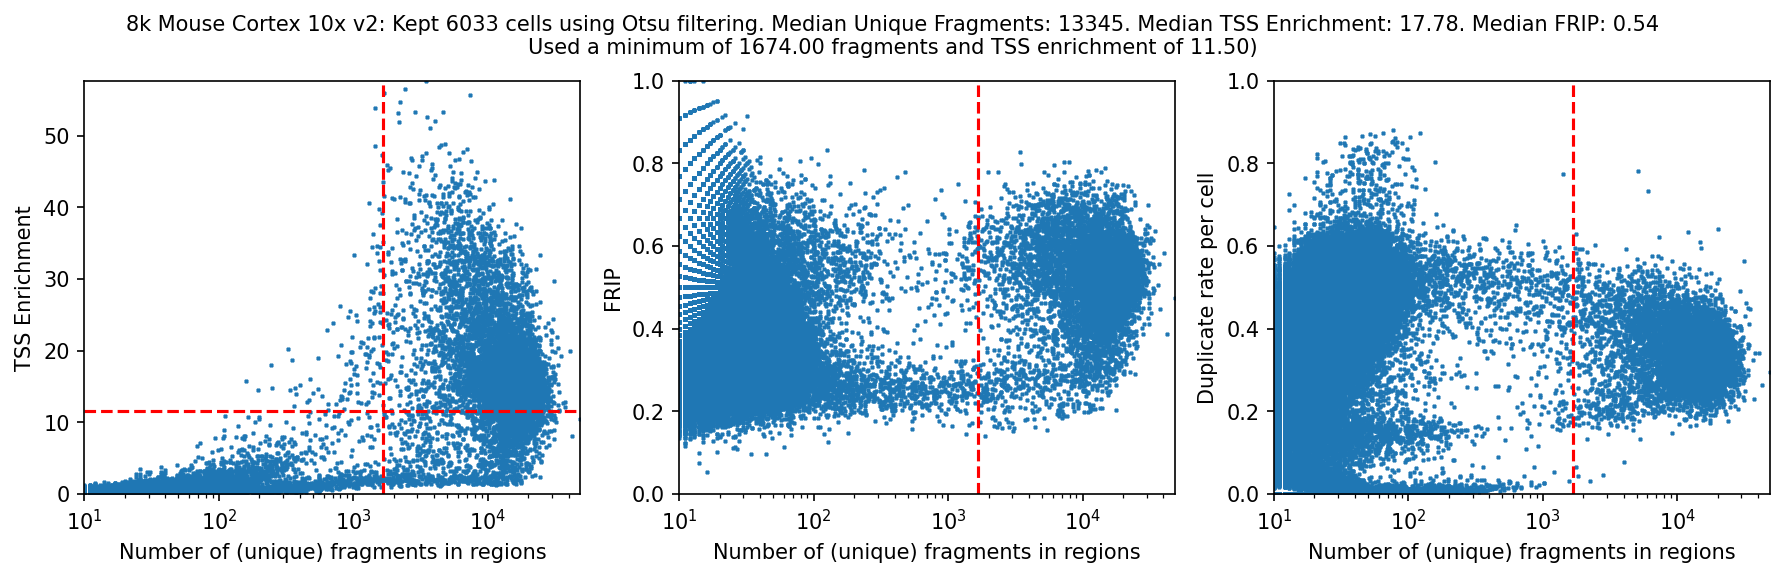

In [35]:
for sample in samples:
    out_path = f"plots_qc/{sample}_qc_otsu.png"
    if os.path.exists(out_path) and not overwrite:
        print(f"{out_path} exists, skipping...")
        display(Image(filename=out_path))

    else:
        print(f"{out_path} does not exist yet, generating...")
        print(f"\tLoading {metadata_bc_pkl_path_dict[sample]}")
        with open(metadata_bc_pkl_path_dict[sample], "rb") as fh:
            metadata_bc_df = pickle.load(fh)

        with open(selected_barcodes_path_dict[sample], "rb") as fh:
            selected_barcodes = pickle.load(fh)

        x_threshold = metadata_bc_df.loc[
            selected_barcodes, "Unique_nr_frag_in_regions"
        ].min()
        y_threshold = metadata_bc_df.loc[selected_barcodes, "TSS_enrichment"].min()

        fig = pum.plot_qc(
            sample=sample,
            sample_alias=sample_alias_dict[sample],
            bc_passing_filters=selected_barcodes,
            x_thresh=x_threshold,
            y_thresh=y_threshold,
            metadata_bc_df=metadata_bc_df,
            max_dict=max_dict,
            min_dict=min_dict,
            include_kde=kde,
        )

        plt.tight_layout()
        plt.savefig(out_path, dpi=300, facecolor="white")
        plt.show()
        plt.close()

# Plot profile data

In [36]:
profile_data_pkl_path_dict = {
    os.path.basename(x).split("__profile_data.pkl")[0]: x
    for x in sorted(glob.glob(f"{cistopic_qc_out}/*__profile_data.pkl"))
}
profile_data_pkl_path_dict

{'8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller': 'cistopic_qc_out/8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller__profile_data.pkl'}

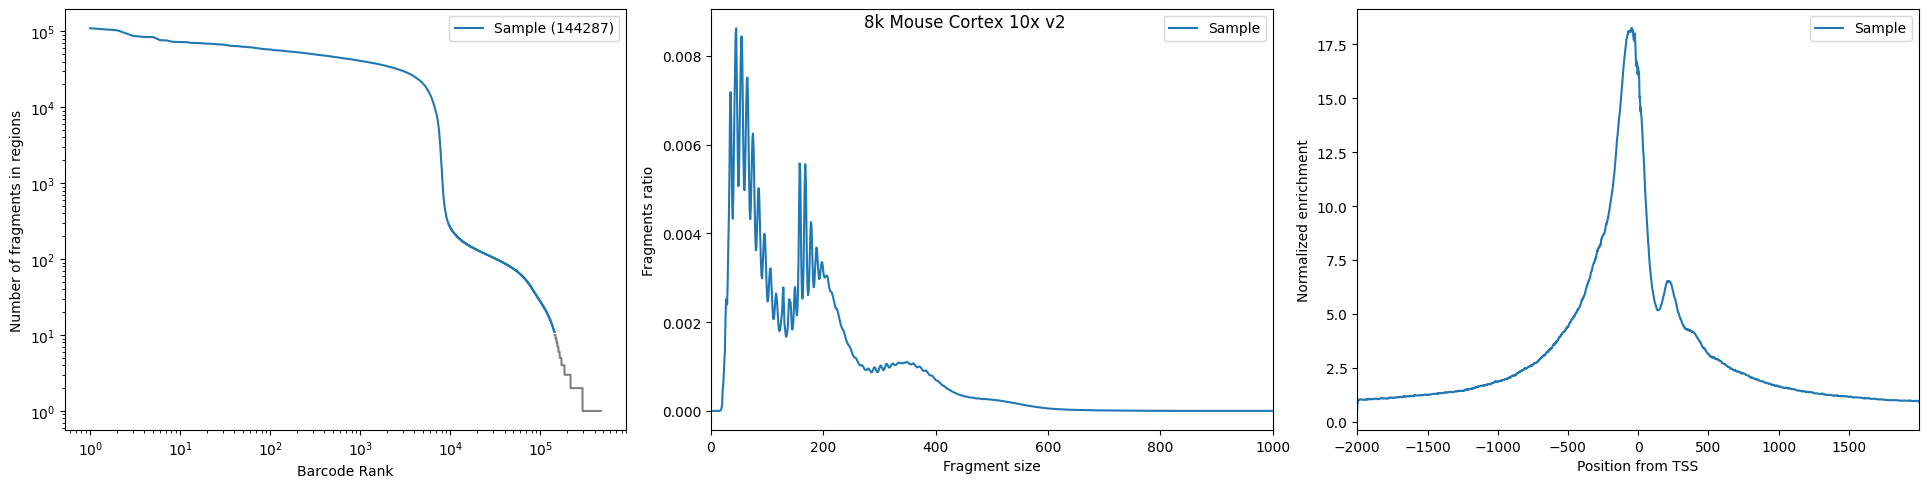

In [37]:
for sample, path in profile_data_pkl_path_dict.items():
    if not os.path.exists(f"plots_qc/{sample}_profile_metrics.png"):
        with open(path, "rb") as fh:
            profile_data_dict = pickle.load(fh)
        with warnings.catch_warnings():
            warnings.simplefilter(action="ignore", category=FutureWarning)
            plot_sample_metrics(
                profile_data_dict,
                ncol=3,
                plot=True,
                profile_list=[
                    "barcode_rank_plot",
                    "insert_size_distribution",
                    "profile_tss",
                ],
                insert_size_distriubtion_xlim=[0, 1000],
            )
            plt.suptitle(sample_alias_dict[sample])
            plt.savefig(
                fname=f"plots_qc/{sample}_profile_metrics.png",
                dpi=300,
                bbox_inches="tight",
                facecolor="white",
            )
            plt.show()
    else:
        display(Image(filename=f"plots_qc/{sample}_profile_metrics.png"))

# 2. Gather QC stats from pipeline output and cisTopic
No need to read this, we are parsing information needed to make the plots below.

In [38]:
verbose = True

In [39]:
df_stats = pum.scrape_mapping_stats(
    pumatac_output_dir=output_dir,
    cr_output_dir=output_dir,
    selected_barcodes_path_dict=selected_barcodes_path_dict,
    pipeline_dict=pipeline_dict,
    verbose=True,
)
df_stats

8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller bc_passing_filters_otsu.txt not found!
percentage_correct_barcodes: 95.49
percent mapq30: 86.6
-------------------------------------



,%_correct_barcodes,n_reads,%_mapq30
8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller,95.49,461891018.0,86.6


### 3c. Single-cell level statistics

In [40]:
metadata_path_dict = {
    x.split("/")[-1].split(f"__metadata_bc.pkl")[0]: x
    for x in sorted(glob.glob(f"{cistopic_qc_out}/*metadata*pkl"))
}
if verbose:
    pp.pprint(metadata_path_dict)

{'8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller': 'cistopic_qc_out/8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller__metadata_bc.pkl'}


In [41]:
selected_cells_path_dict = {
    x.split("/")[-1].split(f"_bc_passing_filters_otsu.pkl")[0]: x
    for x in sorted(glob.glob(f"selected_barcodes/*.pkl"))
}
if verbose:
    pp.pprint(selected_cells_path_dict)

{'8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller': 'selected_barcodes/8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller_bc_passing_filters_otsu.pkl'}


Read the cisTopic output.

In [42]:
df_stats

,%_correct_barcodes,n_reads,%_mapq30
8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller,95.49,461891018.0,86.6


In [43]:
df_scstats_merged, df_stats = pum.scrape_scstats(
    metadata_path_dict, selected_cells_path_dict, df_stats
)

These are variables necessary for plotting (order of samples, color palettes, ...)

Load the reference data from De Rop et al., 2023 and combine it with the user samples:

### 3d. Sequencing efficiency statistics

In [44]:
df_stats_merged = pum.calculate_losses(df_stats, df_scstats_merged)

In [45]:
df_stats_merged.columns

Index(['%_correct_barcodes', 'n_reads', '%_mapq30', 'Median_total_nr_frag',
       'Median_unique_nr_frag', 'Median_dupl_rate',
       'Median_total_nr_frag_in_regions', 'Median_frip',
       'Median_tss_enrichment', 'total_nr_frag_in_selected_barcodes',
       'total_nr_unique_frag_in_selected_barcodes',
       'total_nr_unique_frag_in_selected_barcodes_in_regions',
       'n_barcodes_merged', 'frac_barcodes_merged', 'tech',
       'with_correct_barcode', 'mapped', 'No correct barcode',
       'Not mapped properly', 'Fragments in noise barcodes',
       'Duplicate fragments in cells', 'Unique, in cells, not in peaks',
       'Unique, in cells, in peaks'],
      dtype='object')

Some variables necessary for plotting.

In [46]:
order = [
    "tech",
    "No correct barcode",
    "Not mapped properly",
    "Fragments in noise barcodes",
    "Duplicate fragments in cells",
    "Unique, in cells, not in peaks",
    "Unique, in cells, in peaks",
]

order = order[::-1]

losses_color_palette = palettable.cartocolors.qualitative.Safe_7.get_mpl_colormap()

tech_alias_dict = {
    "10xmultiome": "10x\nMultiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv11c": "10x v1.1\ncontrols",
    "10xv2": "10x v2",
    "ddseq": "Bio-Rad\nddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "mtscatacfacs": "*",
    "s3atac": "s3-ATAC",
    "user_sample": "User samples",
}

# 3. Plot and compare to De Rop et al., 2023 benchmark

In [47]:
sns.set_context("notebook")
sns.set_style("darkgrid")

If you want, you can change the order in which your samples are plotted by manually editing key `user_sample` in the dictionary `order_dict_tech_ultrashort`

### 3a. Sequencing efficiency & Single-cell statistics

In [48]:
individual_barplot_width = 0.5
individual_plot_row_height = 4

In [49]:
tech_order = [
    "10xv1",
    "10xv11",
    "10xv11c",
    "10xv2",
    "10xmultiome",
    "user_sample",
    "mtscatac",
    "mtscatacfacs",
    "ddseq",
    "s3atac",
    "hydrop",
]

Define the sample order:

In [50]:
samples

['8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller']

In [51]:
sample_order = ["8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller"]

In [52]:
ylim_dict = {
    "Unique_nr_frag_in_regions": [0, 20000],
    "Unique_nr_frag_in_regions_k": [0, 20],
    "FRIP": [0, 1],
    "TSS_enrichment": [0, 45],
}

In [53]:
individual_barplot_width = 0.5
individual_plot_row_height = 4

In [54]:
sample_order

['8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller']

/lustre1/project/stg_00002/lcb/fderop/data/PUMATAC_tutorial/pypumatac.py:1834: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


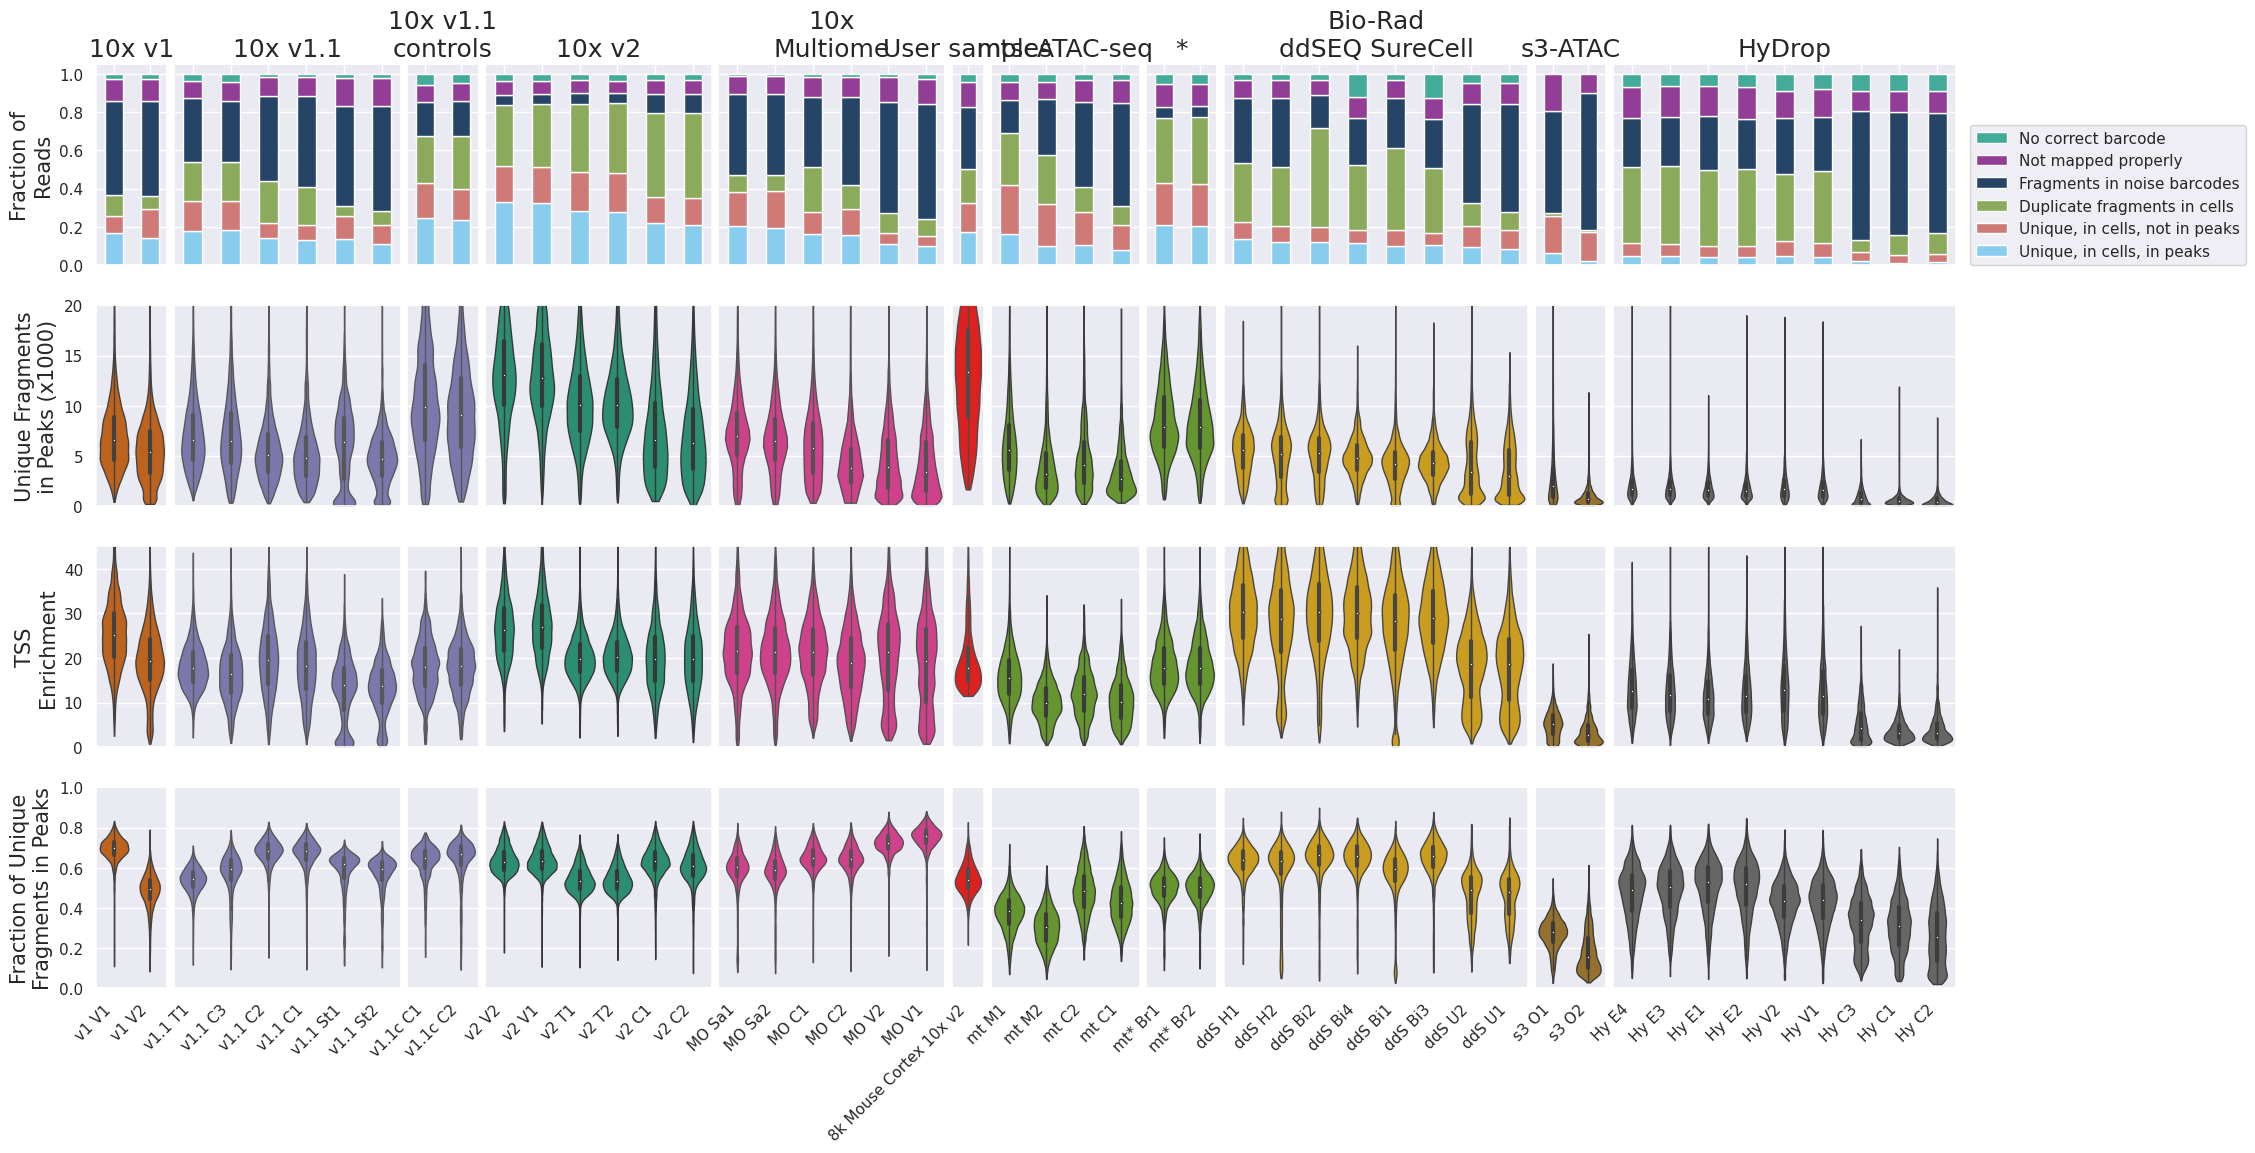

In [55]:
variables_list = ["Unique_nr_frag_in_regions_k", "TSS_enrichment", "FRIP"]

pum.plot_all_qc(
    df_stats_merged,
    df_scstats_merged,
    variables_list,
    sample_order,
    sample_alias_dict,
    tech_order,
    ylim_dict,
    svg_output_path="plots_qc/all_barplots.svg",
    png_output_path="plots_qc/all_barplots.png",
)

Only the user samples:

In [56]:
ymax_frags = (
    df_scstats_merged[df_scstats_merged["tech"] == "user_sample"]
    .groupby("sample_id")["Unique_nr_frag_in_regions"]
    .median()
    .max()
    * 2
)
ymax_frags_k = (
    df_scstats_merged[df_scstats_merged["tech"] == "user_sample"]
    .groupby("sample_id")["Unique_nr_frag_in_regions_k"]
    .median()
    .max()
    * 2
)
ymax_tss = (
    df_scstats_merged[df_scstats_merged["tech"] == "user_sample"]
    .groupby("sample_id")["TSS_enrichment"]
    .median()
    .max()
    * 2
)

ylim_dict = {
    "Unique_nr_frag_in_regions": [0, ymax_frags],
    "Unique_nr_frag_in_regions_k": [0, ymax_frags_k],
    "FRIP": [0, 1],
    "TSS_enrichment": [0, ymax_tss],
}

/lustre1/project/stg_00002/lcb/fderop/data/PUMATAC_tutorial/pypumatac.py:1834: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


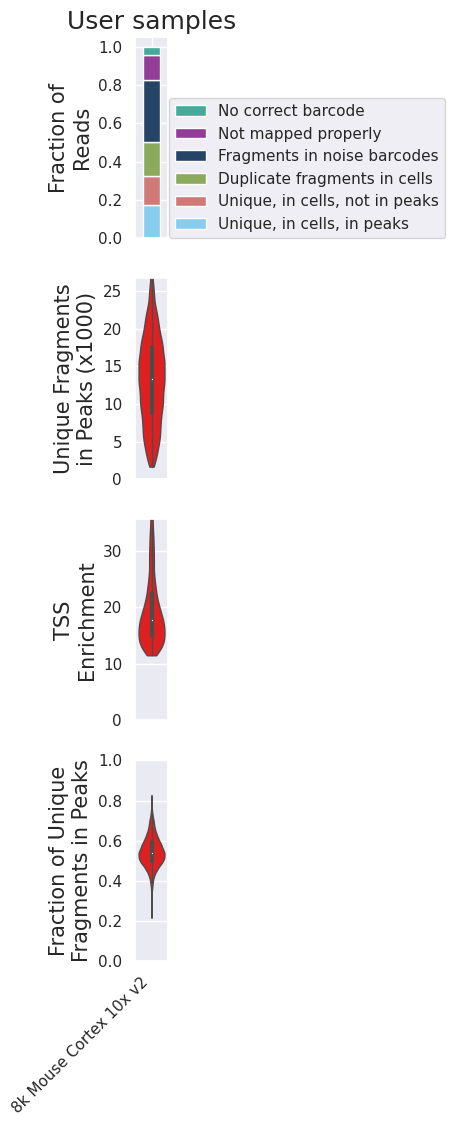

In [57]:
variables_list = ["Unique_nr_frag_in_regions_k", "TSS_enrichment", "FRIP"]

pum.plot_all_qc(
    df_stats_merged,
    df_scstats_merged,
    variables_list,
    sample_order,
    sample_alias_dict,
    ["user_sample"],
    ylim_dict,
    svg_output_path="plots_qc/usersamples_barplots.svg",
    png_output_path="plots_qc/usersamples_barplots.png",
)

# 4. Saturation analysis

The following code subsets the `fragments.tsv.gz` file for selected cells, and then calculates the saturation within these selected cells.

First, load the barcodes we filtered as cells. Make sure that the barcodes match the barcodes in the fragments files! Take special care to remove any suffixes or prefixes that you may have added to the barcodes. For example, cisTopic adds `__{sample}` as a suffix to each barcode:

In [58]:
selected_barcodes_dict = {}
n_cells_dict = {}
for filepath in sorted(glob.glob("selected_barcodes/*pkl")):
    sample = os.path.basename(filepath).split("_bc")[0]
    with open(filepath, "rb") as f:
        selected_barcodes = list(pickle.load(f))
    selected_barcodes = [x.split("___")[0] for x in selected_barcodes]
    newfilepath = filepath.replace(".pkl", ".RAW.txt")
    with open(newfilepath, "w") as fp:
        for item in selected_barcodes:
            fp.write("%s\n" % item)

    selected_barcodes_dict[sample] = selected_barcodes
    n_cells_dict[sample] = len(selected_barcodes)

pp.pprint(n_cells_dict)

{'8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller': 6033}


Get the number of reads per FASTQ

In [59]:
read_count_dict = {}

pumatac_barcode_stats_dict = {
    os.path.basename(x).split(".corrected.bc_stats.log")[0]: x
    for x in glob.glob(f"{output_dir}/data/reports/barcode/*")
}

cellranger_stats_dict = {
    x.split("/")[-3]: x for x in glob.glob(f"{output_dir}/*/outs/summary.csv")
}

for sample, pipeline in pipeline_dict.items():
    if pipeline == "PUMATAC":
        filepath = pumatac_barcode_stats_dict.get(sample)
        if filepath and os.path.exists(filepath):
            df = pd.read_csv(
                filepath, sep="\t\t|\t", engine="python", index_col=0, header=None
            )
            if "ddseq" in sample:
                nreads = df.loc["nbr_reads:", 1]
                nbarcodes_total = df.loc[
                    "nbr_reads_with_bc1_bc2_bc3_correct_or_correctable", 1
                ]
            else:
                nreads = df.loc["nbr_reads:", 1]
                nbarcodes_total = df.loc["total_bc_found", 1]
            percentage_correct_barcodes = nbarcodes_total / nreads * 100
            read_count_dict[sample] = int(nreads)
        else:
            print(f"File for PUMATAC sample {sample} does not exist or is not found!")

    elif pipeline in ["cellranger-arc", "cellranger-atac"]:
        filepath = cellranger_stats_dict.get(sample)
        if filepath and os.path.exists(filepath):
            df = pd.read_csv(filepath)
            if pipeline == "cellranger-arc":
                nreads = df["ATAC Sequenced read pairs"].values[0]
                percentage_correct_barcodes = df["ATAC Valid barcodes"].values[0] * 100
            else:
                nreads = df["Sequenced read pairs"].values[0]
                percentage_correct_barcodes = df["Valid barcodes"].values[0] * 100
            read_count_dict[sample] = int(nreads)
        else:
            print(
                f"File for {pipeline} sample {sample} does not exist or is not found!"
            )

    else:
        print(f"Unknown pipeline {pipeline} for sample {sample}")

print("read_count_dict:")
pp.pprint(read_count_dict)

read_count_dict:
{'8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller': 461891018}


Make a directory where the saturation statistics will be written:

In [60]:
saturation_stats_path = "saturation_stats"
if not os.path.exists(saturation_stats_path):
    os.mkdir(saturation_stats_path)

Check which ones were already run:

In [61]:
sampling_stats_path_dict = {
    x.split("/")[-1].split(".sampling")[0]: x
    for x in sorted(glob.glob(f"{saturation_stats_path}/*.sampling_stats.tsv"))
}
sampling_stats_path_dict

{}

### Calculate the downsampling statistics
We will now downsampled the fragments files at set intervals and calculate quality metrics on these downsampled sets. Then, we will use these datapoints to fit a curve and extrapolate further sequencing saturation.

Define the sampling fractions (levels to which we will downsample the fragments file and calculate saturation):

In [62]:
sampling_fractions = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.97, 1]

### Option #1: Execute the downsampling script using singularity
This is preferred in case you have many fragments files and want to parallelize

In [63]:
raw_barcode_path = {
    os.path.basename(x).split("_bc")[0]: x
    for x in sorted(glob.glob("selected_barcodes/*RAW.txt"))
}
script_path = (
    "PUMATAC_dependencies/single_cell_toolkit/calculate_saturation_from_fragments.py"
)
sif_path = "PUMATAC_dependencies/jupyter_kernels/20230419_pycistopic.sif"
for sample, path in fragments_paths_dict.items():
    command = f"singularity exec -B /lustre1,/staging,/data {sif_path} python {script_path} -i {path} -o {saturation_stats_path}/{sample} -c {raw_barcode_path[sample]} -s {','.join([str(x) for x in sampling_fractions])} &"

    print(command)
    print("\n")

singularity exec -B /lustre1,/staging,/data PUMATAC_dependencies/jupyter_kernels/20230419_pycistopic.sif python PUMATAC_dependencies/single_cell_toolkit/calculate_saturation_from_fragments.py -i output_dir/8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller/outs/fragments.tsv.gz -o saturation_stats/8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller -c selected_barcodes/8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller_bc_passing_filters_otsu.RAW.txt -s 0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.97,1 &




And call these commands in command line. `&` indicates that the command will be submitted as background job.

### Option #2. Run the function directly in this notebook:
Fastest method for a few samples.

In [64]:
covar_dict = {}
best_fit_ab_dict = {}
x_fit_dict = {}
y_fit_dict = {}
pl.enable_string_cache(True)

for sample in list(fragments_paths_dict.keys()):
    print(sample)

    if not sample in sampling_stats_path_dict.keys():
        print(f"{sample} stats do not exist")

        frags_path = fragments_paths_dict[sample]
        fragments_df = pum.read_bc_and_counts_from_fragments_file(frags_path)

        stats_df = pum.sub_sample_fragments(
            fragments_df=fragments_df,
            selected_barcodes=selected_barcodes_dict[sample],
            sampling_fractions=sampling_fractions,
            stats_tsv_filename=f"{saturation_stats_path}/{sample}.sampling_stats.tsv",
            n_reads=read_count_dict[sample],
        )

8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller
8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller stats do not exist
Calculate statistics for sampling fraction 100.0%.
Keep fragments with good barcodes.
Calculate total number of fragments.
Calculate mean number of fragments per barcode and median number of unique fragments per barcode.
Create dataframe with all fragments (for sampling).
Calculate statistics for sampling fraction 10.0%.
Sample 10.0% from all fragments and keep fragments with good barcodes.
Calculate mean number of fragments per barcode.
Calculate median number of unique fragments per barcode.
Calculate statistics for sampling fraction 20.0%.
Sample 20.0% from all fragments and keep fragments with good barcodes.
Calculate mean number of fragments per barcode.
Calculate median number of unique fragments per barcode.
Calculate statistics for sampling fraction 30.0%.
Sample 30.0% from all fragments and keep fragments with good barcodes.
Calculate mean number of fragment

### Plotting the saturation
The following files should be generated:

In [65]:
sampling_stats_path_dict = {
    x.split("/")[-1].split(".sampling")[0]: x
    for x in sorted(glob.glob(f"{saturation_stats_path}/*.sampling_stats.tsv"))
}
sampling_stats_path_dict

{'8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller': 'saturation_stats/8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller.sampling_stats.tsv'}

First, we plot the saturation of median unique fragments per barcode. I also want to find out at which dept I reach 75% of the saturation value (plotted in blue):

In [66]:
percentage_toplot = 0.75

On the x-axis, I want to plot the mean reads per barcode (i.e. the total number of sequenced reads divided by the number of cells), on the y-axis I want the median number of unique fragments, and I also want to indicate the current saturation level (i.e. the saturation of the full, non-sampled fragments file).

I use a michaelis-menten kinetic model to fit these values.

In [67]:
def MM(x, Vmax, Km):
    """
    Define the Michaelis-Menten Kinetics model that will be used for the model fitting.
    """
    if Vmax > 0 and Km > 0:
        y = (Vmax * x) / (Km + x)
    else:
        y = 1e10
    return y

In the following plot, `kRPC` denotes reads per cell (thousands).

In [68]:
sns.set_style("ticks")

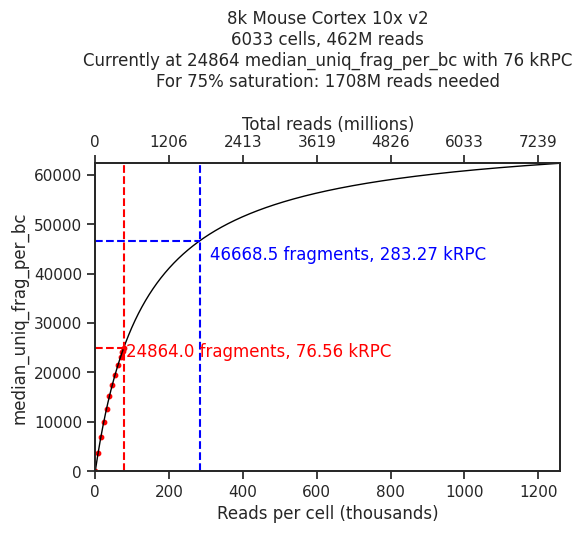

8k Mouse Cortex 10x v2
6033 cells, 462M reads
Currently at 24864 median_uniq_frag_per_bc with 76 kRPC
For 75% saturation: 1708M reads needed



In [69]:
for sample in fragments_paths_dict.keys():
    filepath = sampling_stats_path_dict[sample]
    n_reads = df_stats.at[sample, "n_reads"]
    n_cells = n_cells_dict[sample]

    pum.plot_saturation_fragments(
        filepath,
        sample_alias_dict[sample],
        n_reads,
        n_cells,
        x_axis="mean_reads_per_barcode",
        y_axis="median_uniq_frag_per_bc",
        function=MM,
        percentage_toplot=percentage_toplot,
        plot_current_saturation=True,
        svg_output_path=f"plots_qc/{sample}__fragments_saturation.svg",
        png_output_path=f"plots_qc/{sample}__fragments_saturation.png",
    )

Now, I want the duplication rate (fraction of fragments that are duplicates) on the y-axis instead. I also want to find the depth where 75% of reads are duplicates.

I use a michaelis-menten kinetic model with a maximum value fixed to 1 (number of duplicates cannot exceed 100%) to fit these values.

In [70]:
def MM_duplication(x, Km):
    """
    Define the Michaelis-Menten Kinetics model that will be used for the model fitting.
    """
    if Km > 0:
        y = x / (Km + x)
    else:
        y = 1e10
    return y

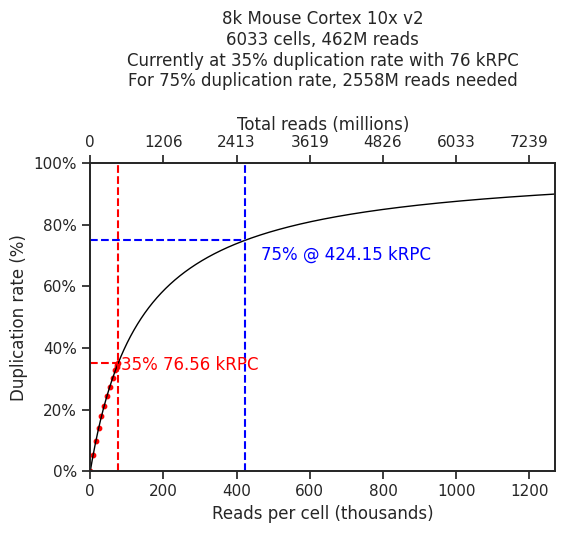

8k Mouse Cortex 10x v2
6033 cells, 462M reads
Currently at 35% duplication rate with 76 kRPC
For 75% duplication rate, 2558M reads needed



In [71]:
for sample in fragments_paths_dict.keys():
    filepath = sampling_stats_path_dict[sample]
    n_reads = read_count_dict[sample]
    n_cells = n_cells_dict[sample]

    pum.plot_saturation_duplication(
        filepath,
        sample_alias_dict[sample],
        n_reads,
        n_cells,
        x_axis="mean_reads_per_barcode",
        y_axis="duplication_rate",
        function=MM_duplication,
        percentage_toplot=percentage_toplot,
        plot_current_saturation=True,
        svg_output_path=f"plots_qc/{sample}__duplication_saturation.svg",
        png_output_path=f"plots_qc/{sample}__duplication_saturation.png",
    )